In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/Project 3.. Amazon Customers Data Analysis')

In [3]:
### Importer les paquets nécessaires ...

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

La colonne ou les caractéristiques de l'ensemble de données :
    
    Id
    ProductId - identifiant unique du produit
    UserId - identifiant unique de l'utilisateur
    ProfileName
    HelpfulnessNumerator - nombre d'utilisateurs qui ont trouvé l'avis utile
    HelpfulnessDenominator - nombre d'utilisateurs ayant indiqué s'ils ont trouvé l'avis utile ou non
    Score - note entre 1 et 5
    Heure : horodatage de l'avis
    Résumé : bref résumé de l'avis
    Text : texte de l'avis

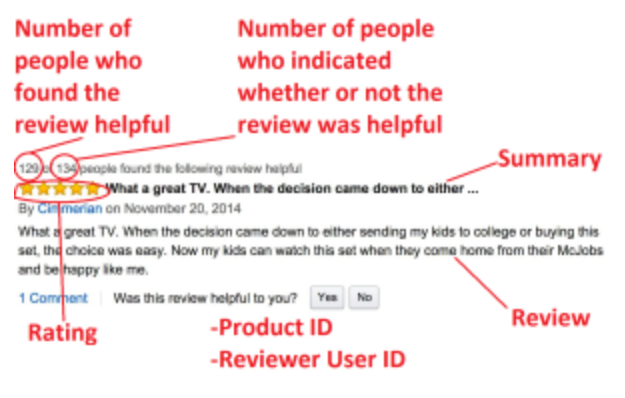

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\mcr\Pictures\Camera Roll/amazon.png')

## 1... lecture de la base de données Sqlite

In [5]:
import sqlite3

In [6]:
# Créer une connexion SQL à notre base de données SQLite
con = sqlite3.connect(r'/content/drive/MyDrive/Project 3.. Amazon Customers Data Analysis/database.sqlite')

In [7]:
type(con)

sqlite3.Connection

#### lire les données de base de données Sqlite

In [8]:
df = pd.read_sql_query("SELECT * FROM REVIEWS" , con)

In [9]:
df.shape ## vérification des dimensions du dataframe df ...

(568454, 10)

In [10]:
df.head() # bref aperçu de notre dataframe

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 2.. Préparation des données !
    Nettoyage de base / traitement des données (suppression des lignes non valides, suppression des lignes dupliquées ...) et conversion de la caractéristique "time" en type de données
    en date-heure

In [11]:
type(df) ## On voit que df est bel et bien un dataframe

pandas.core.frame.DataFrame

In [12]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [13]:
df.columns # lister les différentes colonnes de notre jeu de données

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')



* HelpfulnessDenominator is : est : le nombre de personnes qui ont trouvé l'article utile + le nombre de personnes qui l'ont trouvé moins utile (c'est-à-dire le nombre de personnes qui ont critiqué l'article).

* Helpfulnessnumerator est le nombre de personnes qui ont trouvé l'information utile..... A considérer  comme un pourcentage....

* Ainsi, nous pouvons voir que HelfulnessNumerator est toujours inférieur ou égal à HelpfulnesDenominator....


In [14]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator'] # Affichage des lignes correctes respectant la condition

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [15]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]   ## Affichage des lignes incorrectes ne respectant pas la condition

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [16]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]  ## Selection des lignes correctes respectant la condition et mise à jour du dataframe

In [17]:
df_valid.shape # Vérification de la mise à jour de la taille des données

(568452, 10)

### Vérification de l'existence de données dupliquées

    La déduplication consiste à supprimer les lignes en double. Il est nécessaire de supprimer les doublons afin d'obtenir des résultats homogènes,
    
    Vérification des doublons sur la base de UserId, ProfileName, Time, Text car aucun utilisateur ne peut taper un avis à la même heure pour des produits différents, nous allons donc supprimer ces enregistrements.

In [18]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [19]:
df_valid.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text']) # Vérifier la duplication des données en fonction de nos critères

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [20]:
df_valid[df_valid.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])] # Selectionner les données dupliquées dans notre jeu de données en fonction de nos critères

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


### Environ 174521 sont dupliqués ... vous devez donc supprimer ces lignes dupliquées ....

In [21]:
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text']) #Supprimer les données dupliquées

In [22]:
data.shape

(393931, 10)

In [23]:
data.dtypes # Affichage des types de données des colonnes de notre jeu de données

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

La colonne Time est de time entier 'int64' au lieu d'avoir un format date-time

#### Time - horodatage de l'examen
    convertir le type de données de la colonne Time de int64 à date-time !

In [24]:
data['Time'] # Visualisation de la colonne Time

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [25]:
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

### par défaut nous avons un affichage sous le format : unix start time "1970-01-01"

### 00:00:01.303862400 ->> par défaut ce temps est en "nano-seconde" car la valeur par défaut de l'unité = "ns"
### personnalisons donc le paramètre "unit" pour obtenir le temps en seconde ...

In [26]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
data['Time'] = pd.to_datetime(data['Time'] , unit='s') # Conversion de la colonne pour obtenir le temps en séconde

In [28]:
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

## 3.. Analyser à quel utilisateur Amazon peut recommander plus de produits ?

#### Amazon peut recommander plus de produits à ceux qui vont acheter plus ou à ceux qui ont un meilleur taux de conversion, alors préparons les données en fonction de cet énoncé de problème.

In [29]:
data.shape

(393931, 10)

In [30]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [31]:
data['ProfileName'] #Affichage des nom de profil des utilisateurs

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [32]:
data['ProfileName'].nunique()


218418

### Le nombre total de noms de profil uniques est de 218418.
## Note : Le nom du profil peut être le même mais l'identifiant de l'utilisateur sera différent, alors considérons l'identifiant de l'utilisateur pour cette analyse.

In [33]:
data['UserId'].nunique()

256059

Le nombre total d'utilisateur est de 256059

In [34]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [35]:
data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  })

### Puisque nous voulons des caractéristiques telles que : 'Nombre_de_sommaires', 'nombre_de_textes', 'Score_moyen', 'Nombre_de_produits_achetés'
## Il est donc logique d'appeler les agrégations ci-dessus :

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [36]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  }).sort_values(by='ProductId' , ascending=False) # Affichage des réusltats par ordre décroissant

In [37]:
recommend_df.columns = ['Nombre_de_sommaires' , 'nombre_de_textes' , 'Score_moyen' , 'Nombre_de_produits_achetés']

In [38]:
recommend_df

,Nombre_de_sommaires,nombre_de_textes,Score_moyen,Nombre_de_produits_achetés
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


### Trouvons les 10 premiers utilisateurs !

In [39]:
recommend_df.index[0:10] # Selection du top 10 des utilisateurs

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [40]:
recommend_df['Nombre_de_produits_achetés'][0:10].values # Selection du nombre du top 10 des produits les plus achétés

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

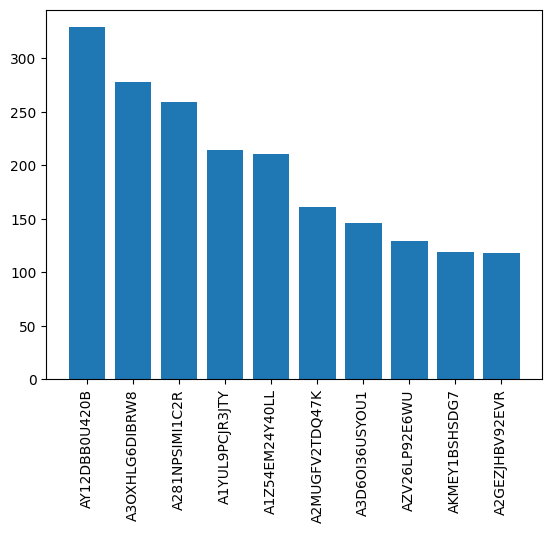

In [41]:
plt.bar(recommend_df.index[0:10] , recommend_df['Nombre_de_produits_achetés'][0:10].values)
plt.xticks(rotation='vertical')

### Inférence : Il s'agit des 10 meilleurs utilisateurs, nous pouvons donc recommander de plus en plus de produits à ces utilisateurs car il y a une forte probabilité que ces personnes achètent davantage.

## 4...Quels sont les produits avec de bons nombres d'avis ?

In [42]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [43]:
len(data['ProductId'].unique())

67624

## Nous pouvons voir qu'il y a 67624 types de produits dans l'ensemble de données.

### Parmi 67624 produits, choisissons le produit le plus vendu pour l'analyser
### Nous considérerons un  produit comme le plus vendu, s'il est vendu au moins 500 fois...

In [44]:
prod_count = data['ProductId'].value_counts().to_frame() # Déterminer le nombre de produits vendus

In [45]:
prod_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [46]:
prod_count['ProductId']>500 # Nous considérerons un produit comme le plus vendu, s'il est vendu au moins 500 fois...

B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: ProductId, Length: 67624, dtype: bool

In [47]:
prod_count[prod_count['ProductId']>500]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [48]:
freq_prod_ids = prod_count[prod_count['ProductId']>500].index # Selection des index des produits les plus vendus

In [49]:
freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [50]:
data['ProductId'].isin(freq_prod_ids) # extraction des produits les plus vendus de notre dataframe

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [51]:
fre_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

In [52]:
fre_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [53]:
fre_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

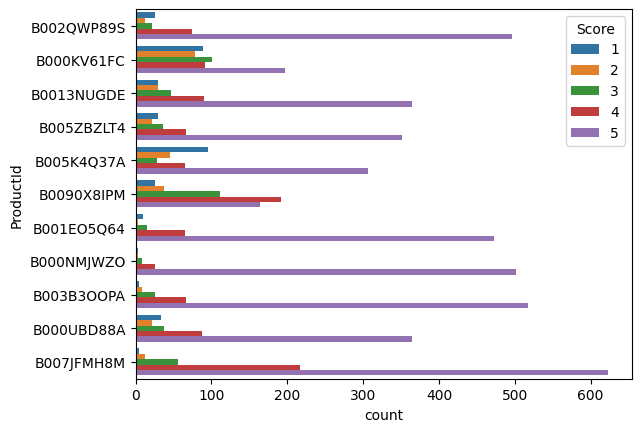

In [54]:
sns.countplot(y = 'ProductId' , data = fre_prod_df , hue='Score') # Affichage de la figure des produits les plus vendus en fonction du nombre de commentaires

## 5... Y a-t-il une différence entre le comportement des utiliteurs fréquents et celui des utiliteurs non fréquents ?


    Tout d'abord, il faut comprendre qui sont les visiteurs fréquents et qui ne le sont pas.

    Les visiteurs fréquents sont ceux qui ont acheté des produits au moins 50 fois ou plus.
    Les visiteurs non fréquents sont ceux qui ont acheté des produits moins de 50 fois.



In [55]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [56]:
x = data['UserId'].value_counts() # détermination du nombre d'achats par utilisateurs

In [57]:
x

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [58]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [59]:
x

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [60]:
x['AY12DBB0U420B']

## "AY12DBB0U420B" a acheté 329 produits .

329

In [61]:
data['viewer_type'] = data['UserId'].apply(lambda user : "Fréquent" if x[user]>50 else "Non Frequent") # Classification des utilisateurs en fréquent et non_fréquent

In [62]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Non Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Non Frequent


In [63]:
data['viewer_type'].unique()

array(['Non Frequent', 'Fréquent'], dtype=object)

## Séparation du dataframe en fonction du type d'utilisateurs.

In [64]:
data['viewer_type']=='Non Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 393931, dtype: bool

In [65]:
not_freq_df = data[data['viewer_type']=='Non Frequent']
freq_df = data[data['viewer_type']=='Fréquent']

In [66]:
freq_df['Score'].value_counts() # Détermination du nombre de scores donné par les utilisateurs fréquents

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

In [67]:
freq_df['Score'].value_counts()/len(freq_df)*100 # Détermination du pourcentage de scores donné par les utilisateurs fréquents

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

In [68]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100 # Détermination du pourcentage de scores donné par les utilisateurs non fréquents

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

<Axes: ylabel='Score'>

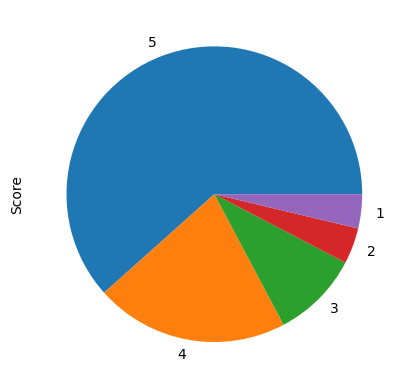

In [69]:
### traçons les résultats ci-dessus à l'aide d'un diagramme à secteurs
freq_df['Score'].value_counts().plot(kind='pie')

<Axes: ylabel='Score'>

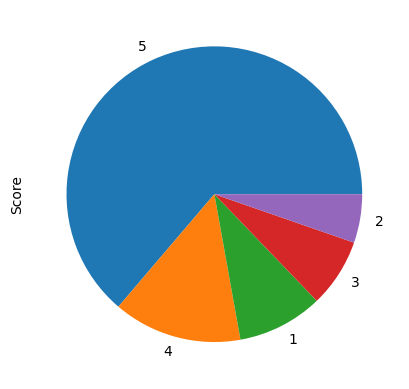

In [70]:
not_freq_df['Score'].value_counts().plot(kind='pie')


    La distribution des évaluations parmi les évaluateurs fréquents est similaire à celle de l'ensemble des évaluations.
    Toutefois, nous pouvons constater que les évaluateurs fréquents donnent moins d'évaluations 5 étoiles et moins d'évaluations 1 étoile.
    Les utilisateurs fréquents semblent faire preuve de plus de discernement en ce sens qu'ils donnent moins d'évaluations extrêmes que les utilisateurs peu fréquents.

'

## 6.. Les utilisateurs fréquents sont-ils plus bavards ?  


In [71]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [72]:
data['Text'] # Selection des différents commentaires des utilisateurs

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [73]:
data[['UserId' , 'ProductId' , 'Text']] # Selection des données contenant les colonnes  'UserId' , 'ProductId' , 'Text'.

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [74]:
data['Text'][0] # Affichage du premier commentaire

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [75]:
def calculate_length(text):
    return len(text.split(' ')) # fonction permettant de déterminer le nombre de mots dans un commentaire

In [76]:
data['Text_length'] = data['Text'].apply(calculate_length) # Application de la fonction et création d'une nouvelle colonne 'Text_length'

##Séparation du dataframe en fonction du type d'utilisateurs.

In [77]:
not_freq_data = data[data['viewer_type']=='Non Frequent']
freq_data = data[data['viewer_type']=='Fréquent']

In [78]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Non Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Non Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Non Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Non Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Non Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Non Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Non Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Non Frequent,37


## Visualition à partir d'un diagramme en boîte

(0.0, 600.0)

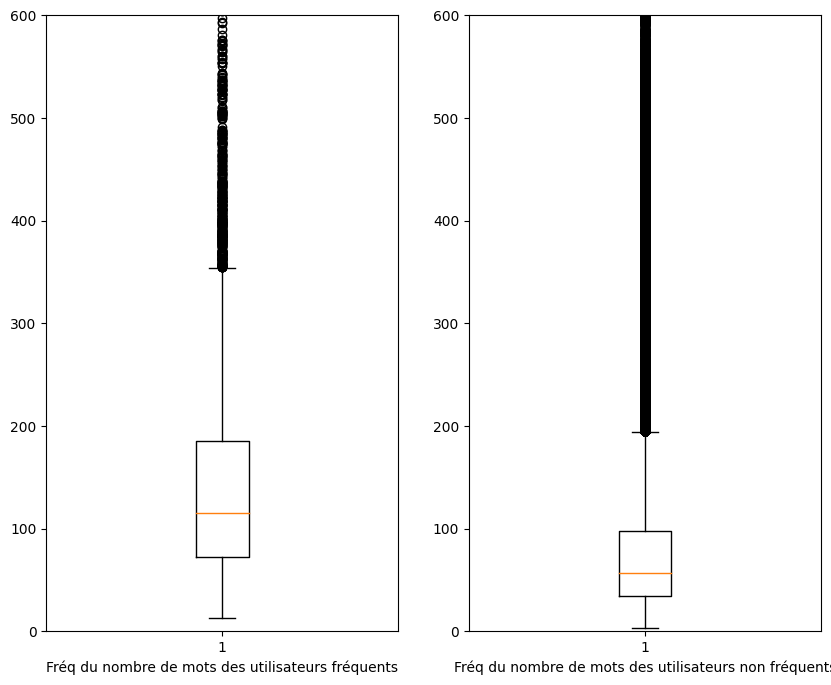

In [79]:


fig = plt.figure(figsize=(10,8))

# Ajout des sous figures
ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel('Fréq du nombre de mots des utilisateurs fréquents') ## Nommer l'axe x
ax1.set_ylim(0,600) ## Fixer la limite sur l'axe y
ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel('Fréq du nombre de mots des utilisateurs non fréquents')
ax2.set_ylim(0,600)

##Conclusion :

    Les distributions des nombres de mots pour les commentaires fréquents et peu fréquents montrent que les évaluateurs peu fréquents ont un grand nombre d'évaluations à faible nombre de mots.

    D'autre part, la plus grande concentration de mots est plus élevée pour les évaluateurs fréquents que pour les évaluateurs peu fréquents.

## 7... analyse des sentiments !

#### Qu'est-ce que l'analyse des sentiments ?
    L'analyse des sentiments est une tâche informatique qui consiste à déterminer automatiquement les sentiments exprimés par un auteur dans un texte
    Voici quelques exemples d'applications de l'analyse des sentiments

    1. L'analyse des discussions sur les médias sociaux autour d'un certain sujet
    2. L'évaluation des réponses à une enquête
    3. Déterminer si les évaluations de produits sont positives ou négatives

In [80]:
!pip install textblob

In [94]:
from textblob import TextBlob # package pour l'analyse des sentiments

In [95]:
data['Summary'][0] # Visualisation d'un commentaire

'Good Quality Dog Food'

In [96]:
TextBlob('Good Quality Dog Food').sentiment.polarity # Détermination de la polarité ou le sentiment d'un commentaire

# Lorsque la polarité tend vers -1 : sentiment négatif
# Lorsque la polarité tend vers 1: sentiment positif
# Lorsque la polarité tend vers 0: sentiment positif

0.7

In [97]:
data.shape

(393931, 12)

In [98]:
polarity = []

for text in data['Summary']: # liste qui contiendra la polarité des commentaires
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)


In [100]:
data['polarity'] = polarity

In [101]:
data.head() # Visualisation du nouveau dataset avec la colonne polarité

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Non Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Non Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Non Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Non Frequent,30,0.8


In [102]:
data_negative= data[data['polarity']<0] # Selection des commentaires négatifs

data_positive= data[data['polarity']>0]  # Selection des commentaires positifs

In [103]:
from collections import Counter

In [106]:
neg_keywords=Counter(data_negative['Summary']).most_common(10) ## 10 mots-clés négatifs les plus utilisés
pos_keywords=Counter(data_positive['Summary']).most_common(10) ## 10 mots-clés positifs les plus utilisés

In [129]:
keywords_neg, frequencies_neg = zip(*neg_keywords)
keywords_pos, frequencies_pos = zip(*pos_keywords)

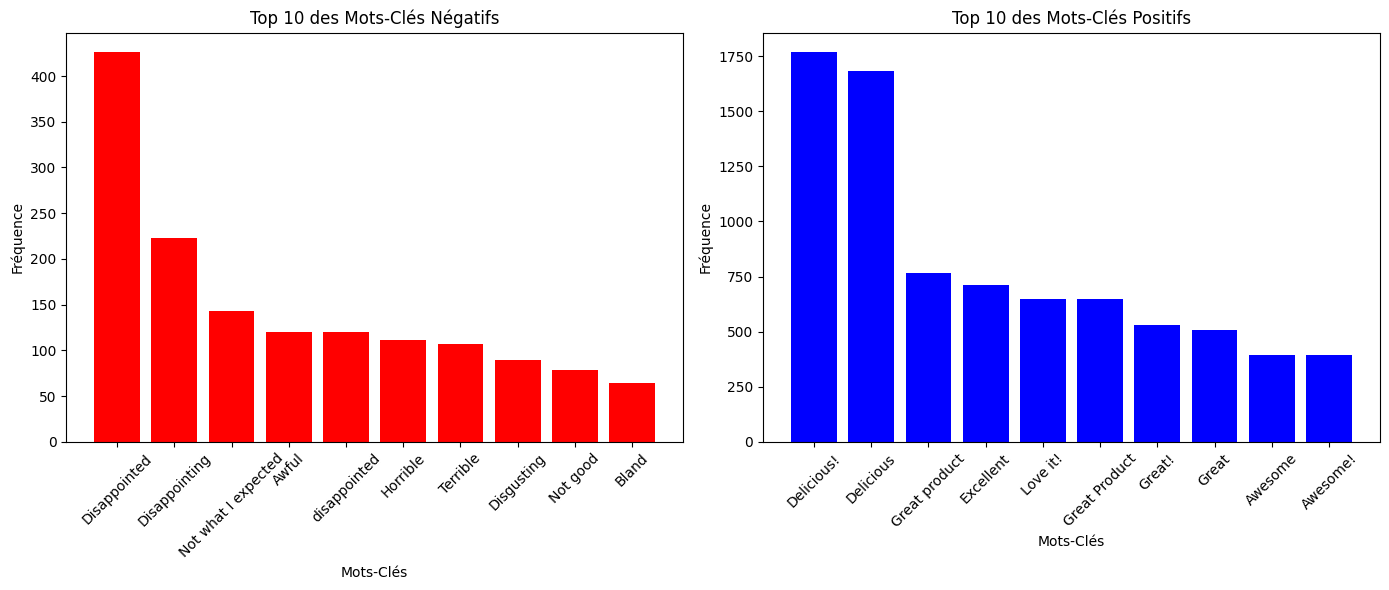

In [131]:

plt.figure(figsize=(14, 6))

# Créez le premier subplot (à gauche)
plt.subplot(1, 2, 1)
plt.bar(keywords_neg, frequencies_neg, color='red')
plt.xlabel('Mots-Clés')
plt.ylabel('Fréquence')
plt.title('Top 10 des Mots-Clés Négatifs')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité

# Créez le deuxième subplot (à droite)
plt.subplot(1, 2, 2)
plt.bar(keywords_pos, frequencies_pos, color='blue')
plt.xlabel('Mots-Clés')
plt.ylabel('Fréquence')
plt.title('Top 10 des Mots-Clés Positifs')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité

plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()



#Fin